# 차원축소

- 우리는 데이터가 가진 속성을 특성이라 불렀다. 아이리스 데이터 같은 경우는 특성이 4개 존재한다. 머신러닝에서 이런 특성을 **차원**이라고 부른다. 만약 어떤 데이터셋의 특성이 1000개라고 가정하면, 1000개의 특성은 1000개의 차원이라고도 할 수 있다. 이러한 차원을 줄인다면 저장 공간을 줄일 수 있을 뿐만 아니라 머신러닝에서 학습 속도 또한 증가할 수 있을 것이다.
- 많은 특성을 한 번에 시각화하기 위함.
- 차원 축소는 비지도 학습 중 하나의 알고리즘이다.

## PCA 개요

[참고 자료](https://brunch.co.kr/@linecard/535)

주성분 분석(PCA)은 데이터에 있는 분산이 큰 방향을 찾는 것으로 이해할 수 있다.   
분산은 데이터가 널리 퍼져있는 정도를 의미한다.  
분산이 큰 방향을 데이터로 잘 표현하는 벡터로 생각할 수 있다.  

In [1]:
# 한글폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

* 런타임 다시 시작 

In [1]:
# 런타임 다시 시작 후 다시 실행
import numpy as np
import matplotlib as mpl # 기본 설정 만지는 용도
import matplotlib.pyplot as plt
import scipy.stats
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
fm._rebuild()
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
# Colab의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic')
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
from sklearn.datasets import load_iris
import pandas as pd

# 사이킷런 내장 데이터셋 API 호출
iris = load_iris()

# 넘파이 데이터셋을 Pandas DataFrame으로 변환
columns = ['꽃받침_길이', '꽃받침_너비', '꽃잎_길이', '꽃잎_너비']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,꽃받침_길이,꽃받침_너비,꽃잎_길이,꽃잎_너비,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


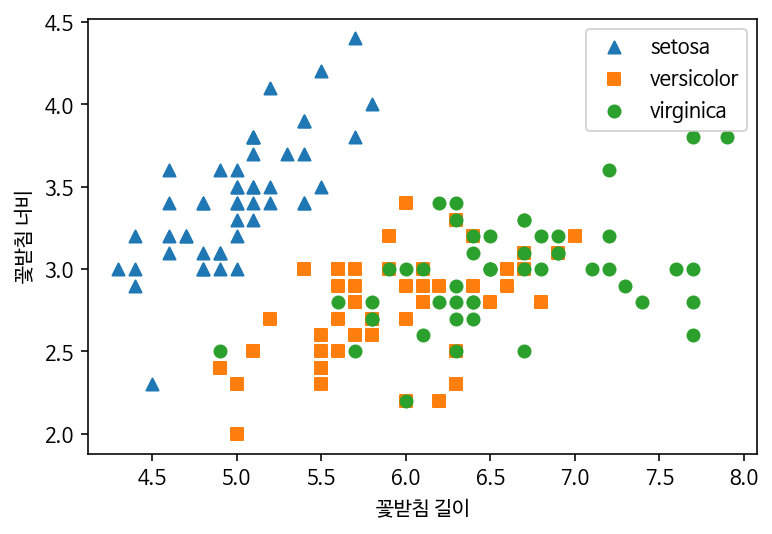

In [4]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers = ['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2.
# 각 target 별로 다른 shape로 scatter
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['꽃받침_길이']
    y_axis_data = irisDF[irisDF['target']==i]['꽃받침_너비']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('꽃받침 길이')
plt.ylabel('꽃받침 너비')
plt.show()

In [5]:
from sklearn.preprocessing import StandardScaler

iris_scaled = StandardScaler().fit_transform(irisDF)

스케일링 후 4차원의 붓꽃 데이터를 2차원 PCA로 변환. 사이킷런의 PCA 클래스를 활용.  
n_components 파라미터는 PCA로 변경할 차원의 수를 의미.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
# PCA 변환된 데이터의 컬럼명을 각각 pca_component_1, pca_componenet_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


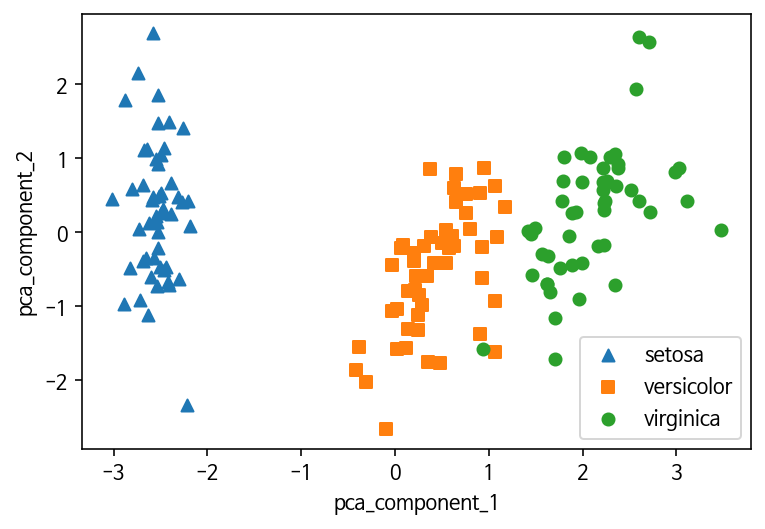

In [9]:
# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표시
markers = ['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 scatter plot 수행
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [10]:
# explained_variance_ratio_는 PCA 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 나타낸다.
print(pca.explained_variance_ratio_)

[0.76740358 0.18282727]


pca_component_1은 전체 변동성의 약 76%를 차지하며, pca_component_2는 약 18%를 차지한다.  
따라서 두 개의 PCA요소로만 변환해도 원본 데이터의 변동성을 94% 설명가능하다.